In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv('College_Data',index_col=0)

In [7]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


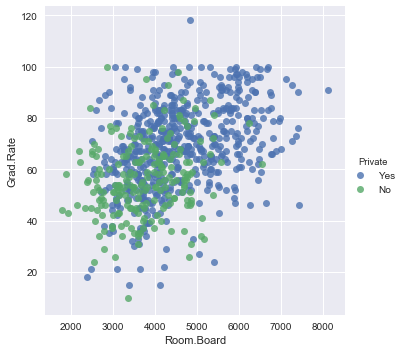

In [12]:
sns.lmplot(x='Room.Board',y='Grad.Rate',data=df,hue='Private',fit_reg=False,aspect=1) 

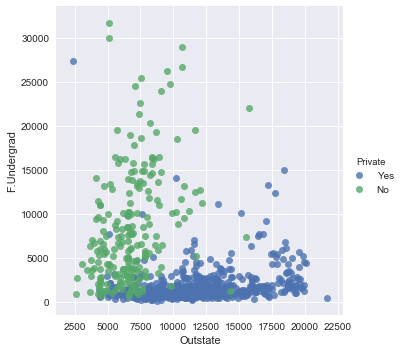

In [16]:
sns.lmplot(x='Outstate',y='F.Undergrad',data=df,hue='Private',fit_reg=False,aspect=1) 

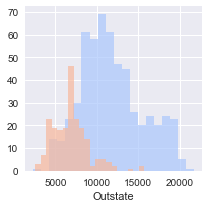

In [17]:
g=sns.FacetGrid(df,hue='Private',palette='coolwarm')
g=g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

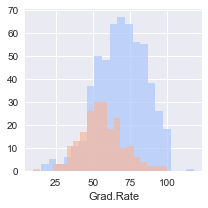

In [18]:
g=sns.FacetGrid(df,hue='Private',palette='coolwarm')
g=g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [19]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [20]:
df['Grad.Rate']['Cazenovia College']=100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


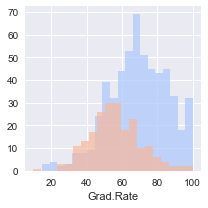

In [22]:
g=sns.FacetGrid(df,hue='Private',palette='coolwarm')
g=g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans=KMeans(n_clusters=2)

In [25]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
kmeans.cluster_centers_

array([[  1.81323468e+03,   1.28716592e+03,   4.91044843e+02,
          2.53094170e+01,   5.34708520e+01,   2.18854858e+03,
          5.95458894e+02,   1.03957085e+04,   4.31136472e+03,
          5.41982063e+02,   1.28033632e+03,   7.04424514e+01,
          7.78251121e+01,   1.40997010e+01,   2.31748879e+01,
          8.93204634e+03,   6.50926756e+01],
       [  1.03631389e+04,   6.55089815e+03,   2.56972222e+03,
          4.14907407e+01,   7.02037037e+01,   1.30619352e+04,
          2.46486111e+03,   1.07191759e+04,   4.64347222e+03,
          5.95212963e+02,   1.71420370e+03,   8.63981481e+01,
          9.13333333e+01,   1.40277778e+01,   2.00740741e+01,
          1.41705000e+04,   6.75925926e+01]])

In [27]:
def converter(private):
    if private=='Yes':
        return 1
    else:
        return 0

In [28]:
df['Cluster']=df['Private'].apply(converter
                                 )

In [29]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[138  74]
 [531  34]]
             precision    recall  f1-score   support

          0       0.21      0.65      0.31       212
          1       0.31      0.06      0.10       565

avg / total       0.29      0.22      0.16       777

